# Calculate angular Cl's with CCL
In this example, we will calculate the lensing angular power spectrum for an example cosmology.

In [1]:
import numpy as np
import pylab as plt
import pyccl as ccl
%matplotlib inline

### Set up a Cosmology object
We begin by creating a new `Cosmology` object with a set of cosmology parameters:

In [2]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)

### Define a source number density
The angular power spectrum is weighted by the source number density as a function of redshift, dN/dz. We define an example here.

In [3]:
z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
dNdz = Ngal * pz # Number density distribution

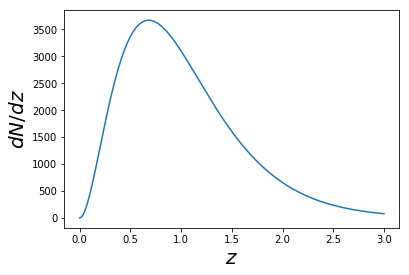

In [4]:
plt.plot(z, dNdz)
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
plt.show()

### Create Tracer objects
CCL manages auto- and cross-spectrum calculations through `Tracer` objects. For the sake of this example we will define two separate tracers, but both will effectively be the same tracer (so we end up calculating the auto-spectrum).

In [5]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz))
lens2 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz))

If we wanted to include intrinsic alignments, we could have created the `Tracer` object like so:

In [7]:
bias_ia = np.ones(z.size) # Intrinsic alignment bias factor
f_red = 0.5 * np.ones(z.size) # Fraction of red galaxies
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz), ia_bias=(z, bias_ia), red_frac=(z, f_red))

In [8]:
z_ia = np.linspace(0., 3., 5) # Only 5 redshift bins
bias_ia2 = np.ones(z_ia.size)
lens2_ia = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz), ia_bias=(z_ia, bias_ia2), red_frac=(z, f_red))

The bias, red fraction, redshift distribution etc. are stored inside the `Tracer` object when you create it. The arrays can be accessed as parameters of the `Tracer` object, e.g. `lens2_ia.z_n` and `lens2_ia.n` would return the dN/dz array and its redshift sampling.

You can also retrieve these quantities at any arbitrary redshift using the same interpolation scheme that CCL uses internally. To do so, use the following syntax:

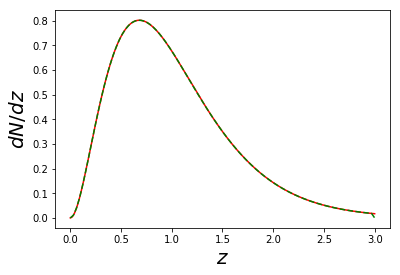

In [9]:
z_interp=np.linspace(0.,3.,100)
nz_interp=lens1_ia.get_internal_function(cosmo,'dndz',1/(1+z_interp))

#Plot with input N(z)
plt.plot(z, dNdz/np.sum(dNdz*(z[1]-z[0])),'r-')
plt.plot(z_interp,nz_interp,'g--')
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
plt.show()

### Calculate the angular power spectrum
We can now calculate the angular power spectrum for the tracer(s). Internally, the calculation will be performed up to some $\ell_{\rm max}$, which will be relatively slow when first run. If we call the `angular_cl` function again with a different $\ell$ sampling, it will be quickly evaluated from a spline though.

In [10]:
ell = np.arange(2, 100)
cls = ccl.angular_cl(cosmo, lens1, lens2, ell)

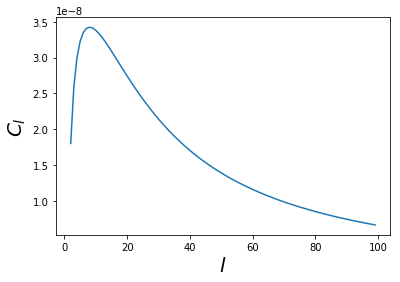

In [11]:
plt.plot(ell, cls)
plt.xlabel(r'$l$', fontsize=20)
plt.ylabel(r'$C_l$', fontsize=20)
plt.show()

#### CMB lensing cross-correlation example
CCL also supports auto- and cross-correlations for CMB lensing. This is treated as another "tracer" within CCL, so you can perform the cross-correlation between the lensing samples defined above and CMB lensing as follows:

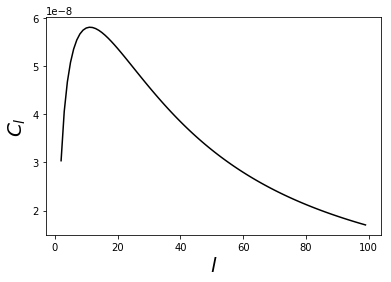

In [12]:
cmbl = ccl.CMBLensingTracer(cosmo, 1090.)
cls_cmb_cross_lens1 = ccl.angular_cl(cosmo, lens1, cmbl, ell)

plt.plot(ell, cls_cmb_cross_lens1, 'k-')
plt.xlabel(r'$l$', fontsize=20)
plt.ylabel(r'$C_l$', fontsize=20)
plt.show()